### Comparative Analysis on Heart Disease Prediction

#### About the Dataset
The dataset used for implementation purpose is the Heart Disease dataset taken from the UCI repository. The dataset consists of 303 individuals data records and 14 columns.

Link to dataset: https://archive.ics.uci.edu/ml/datasets/Heart%20Disease

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')

In [ ]:
dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
dataset.shape

(299, 13)

In [ ]:
dataset.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [ ]:
dataset.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# Data Preprocessing

In [ ]:
# Check out the missing values
#The concept of missing values is important to understand in order to successfully manage data. There is no missing or Nan values present in our dataset.
dataset.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

# Looking for Correlations
    Correlation coeff ranges from -1 to 1.
        1 -> strong positive correlation
        0 -> no correlation
       -1 -> strong negative correlation

<function matplotlib.pyplot.show>

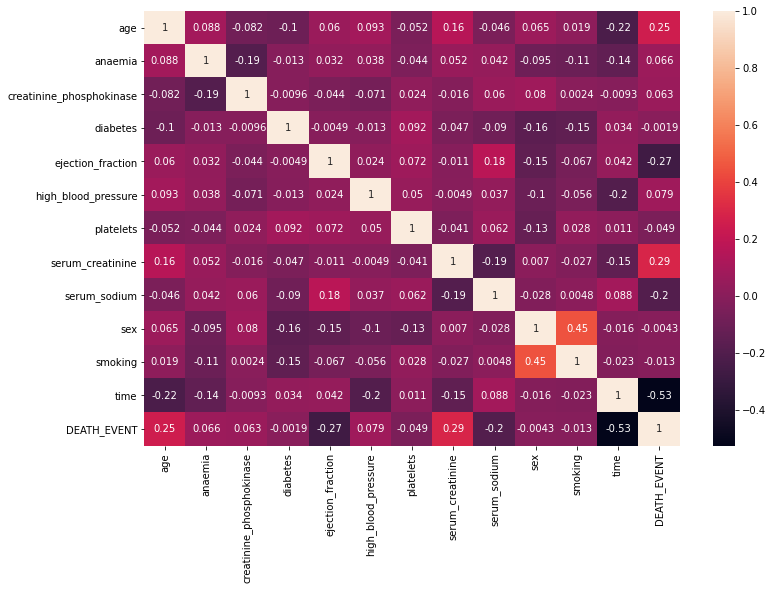

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(dataset.corr(), annot=True)
plt.show

## Visualizations

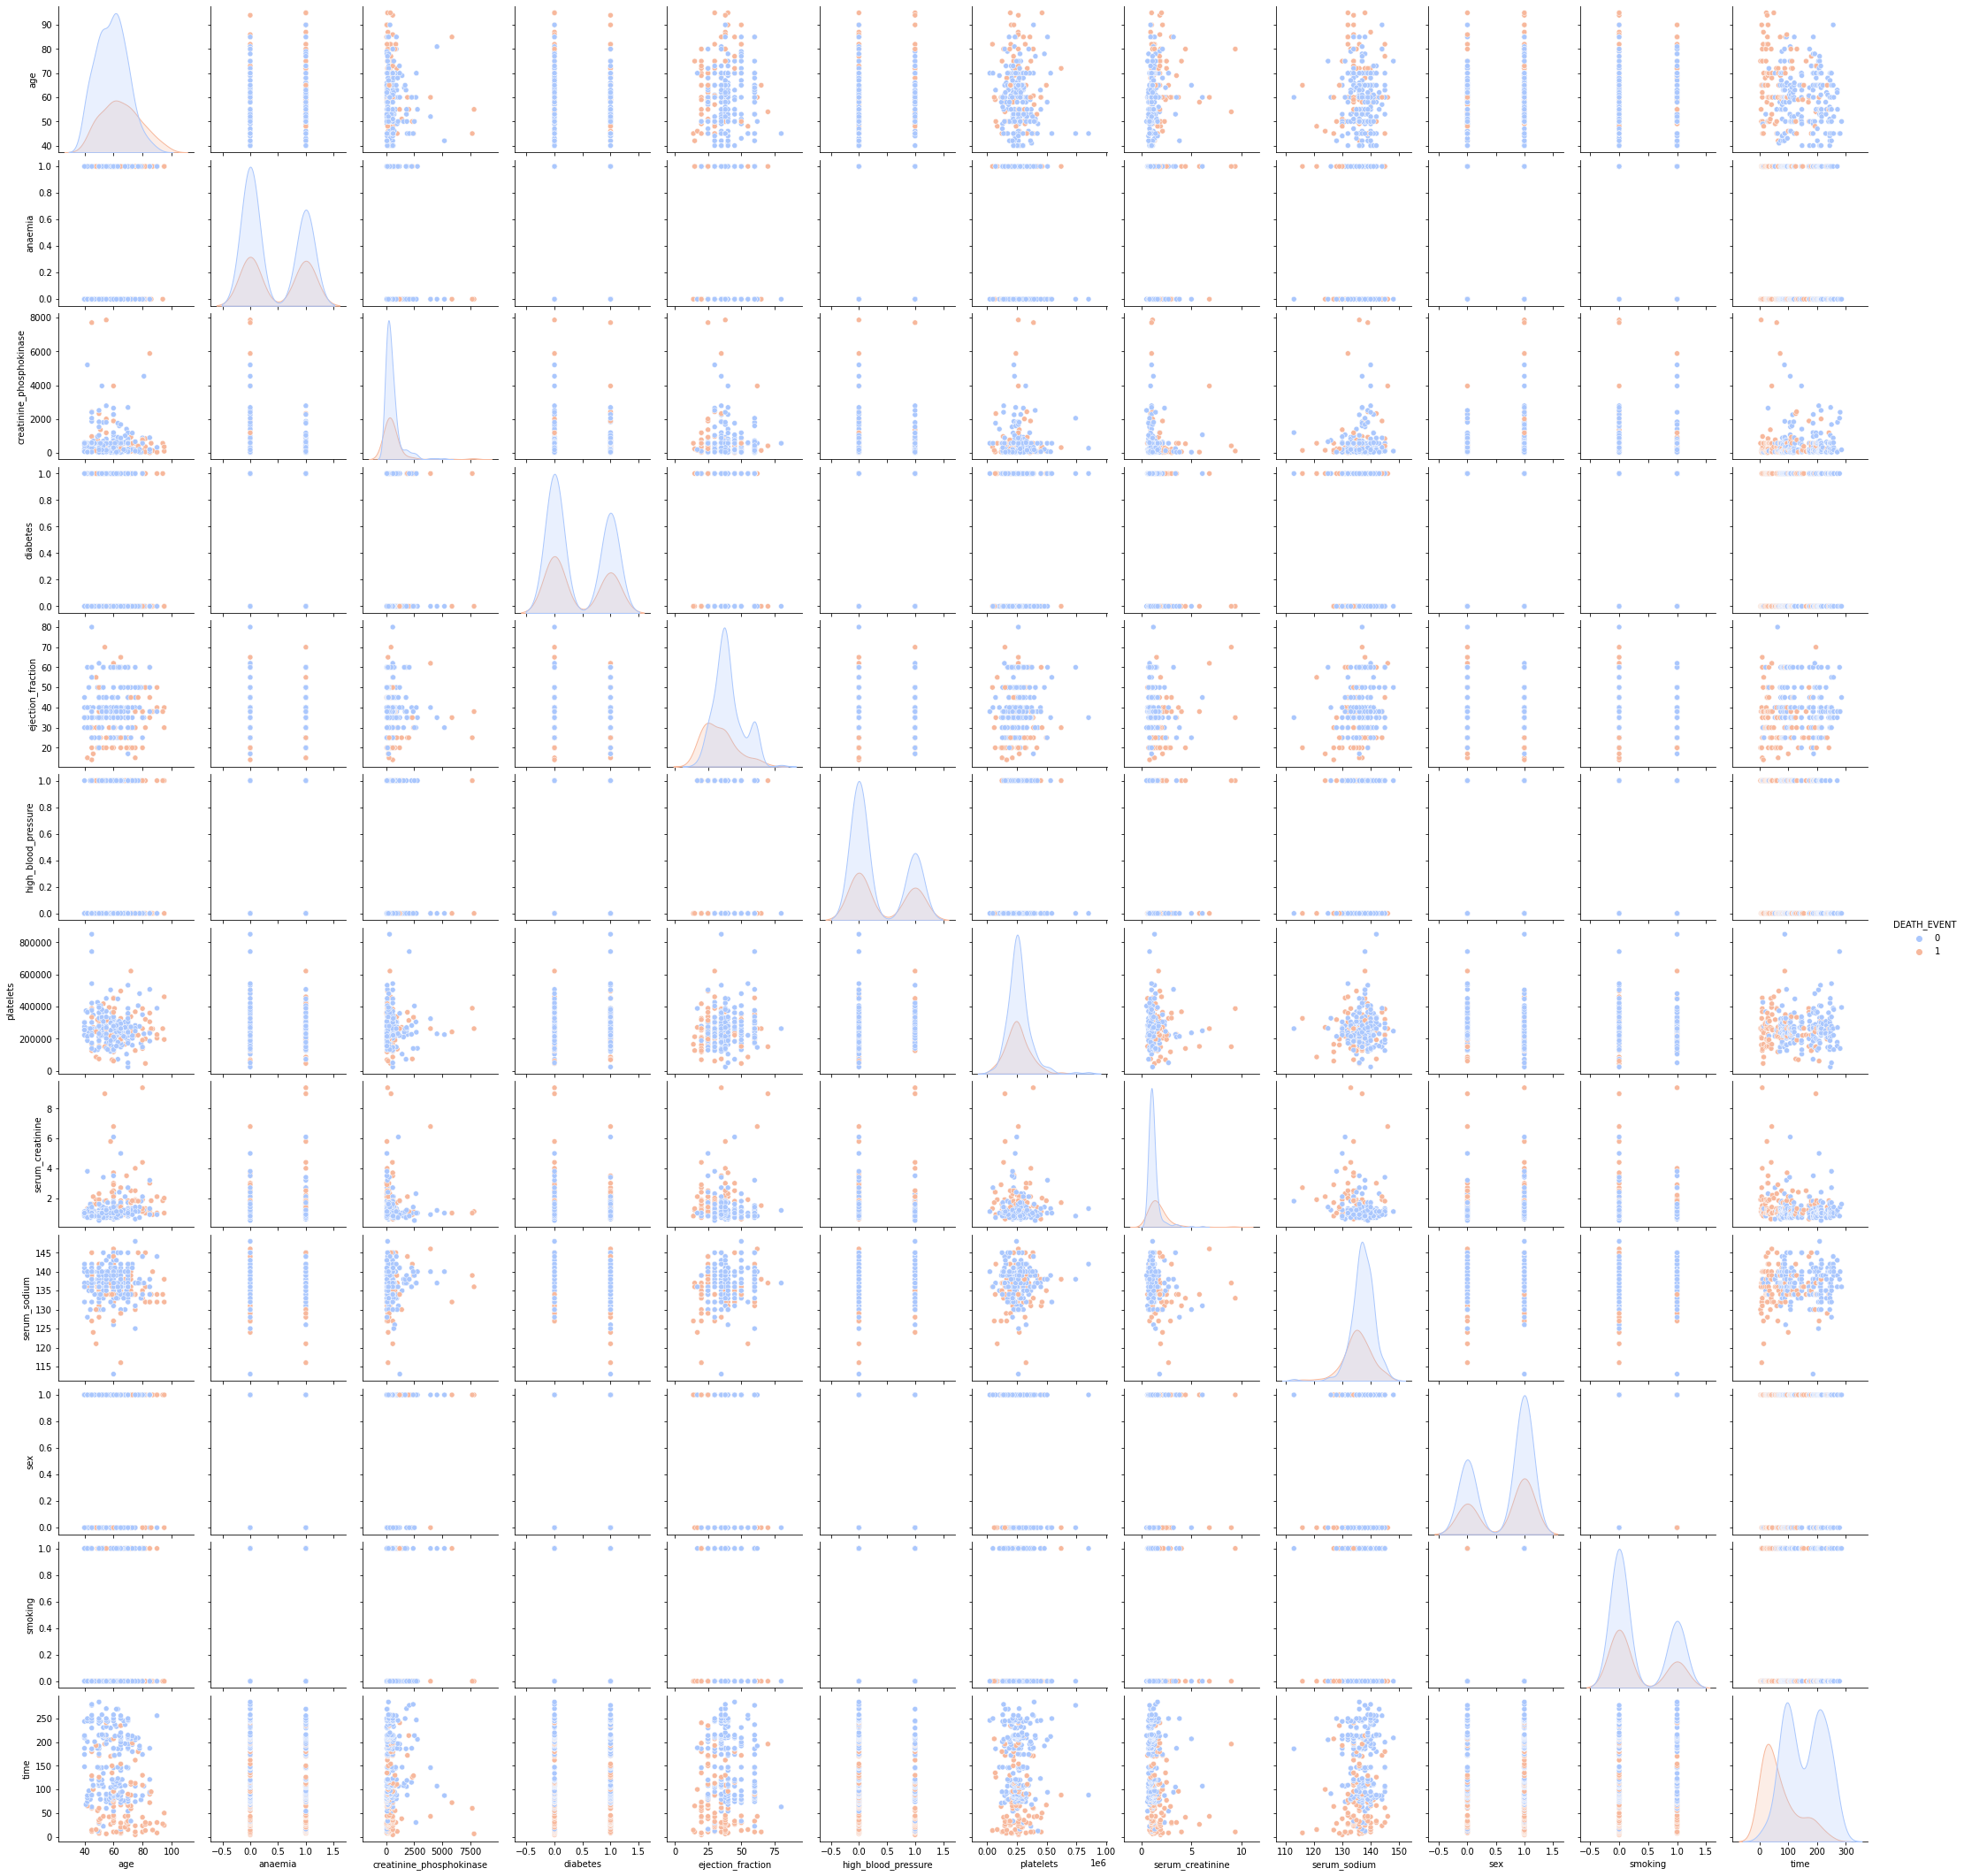

In [ ]:
sns.pairplot(dataset,hue='DEATH_EVENT',palette='coolwarm')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.metrics import classification_report

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
#Take all the columns except last one
X = dataset.iloc[:, 0:12]
#Take the last column as the result
y = dataset.iloc[:, 12]

In [ ]:
# Splitting the dataset into the Training set and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
# Feature Scaling
# Not required because decision trees are not based on eculidian distances
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
name = []
Scores = []
rmse = []

## KNN

In [ ]:
# Fitting K-NN to the Training set
classifier = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# K-Fold cross validation
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)

In [ ]:
model_accuracy = accuracies.mean()
model_accuracy

0.68399209486166

In [ ]:
model_std = accuracies.std()
model_std

0.07138437311938768

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[51,  2],
       [18,  4]])

In [ ]:
# Genarate Reports
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.96      0.84        53
           1       0.67      0.18      0.29        22

    accuracy                           0.73        75
   macro avg       0.70      0.57      0.56        75
weighted avg       0.72      0.73      0.67        75



In [ ]:
y_pred = classifier.predict(X_test)
knn_mse = mean_squared_error(y_test, y_pred)
knn_rmse = np.sqrt(knn_mse)
knn_rmse

0.5163977794943222

In [ ]:
knn_score=classifier.score(X_test,y_test)
knn_score

0.7333333333333333

In [ ]:
name.append('K Nearest neighbours')
Scores.append(knn_score)
rmse.append(knn_rmse)

## Decision Tree

In [ ]:
# Fitting Decision Tree Classification to the Training set
classifier = DecisionTreeClassifier(criterion = 'entropy')
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[46,  7],
       [ 7, 15]])

In [ ]:
# Genarate Reports
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        53
           1       0.68      0.68      0.68        22

    accuracy                           0.81        75
   macro avg       0.77      0.77      0.77        75
weighted avg       0.81      0.81      0.81        75



In [ ]:
y_pred = classifier.predict(X_test)
tree_mse = mean_squared_error(y_test, y_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.43204937989385733

In [ ]:
tree_score=classifier.score(X_test,y_test)
tree_score

0.8133333333333334

In [ ]:
name.append('Decision Tree')
Scores.append(tree_score)
rmse.append(tree_rmse)

# Support Vector Classifier

In [ ]:
# Fitting SVM to the Training set
classifier = SVC(kernel = 'linear')
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[49,  4],
       [ 7, 15]])

In [ ]:
# Genarate Reports
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        53
           1       0.79      0.68      0.73        22

    accuracy                           0.85        75
   macro avg       0.83      0.80      0.82        75
weighted avg       0.85      0.85      0.85        75



In [ ]:
y_pred = classifier.predict(X_test)
svc_mse = mean_squared_error(y_test, y_pred)
svc_rmse = np.sqrt(svc_mse)
svc_rmse

0.38297084310253526

In [ ]:
svc_score=classifier.score(X_test,y_test)
svc_score

0.8533333333333334

In [ ]:
name.append('Support Vector Classifier')
Scores.append(svc_score)
rmse.append(svc_rmse)

## Naive Bayes Classifier

In [ ]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Fitting Decision Tree Classification to the Training set
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[48,  5],
       [10, 12]])

In [ ]:
# Genarate Reports
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.86        53
           1       0.71      0.55      0.62        22

    accuracy                           0.80        75
   macro avg       0.77      0.73      0.74        75
weighted avg       0.79      0.80      0.79        75



In [ ]:
y_pred = classifier.predict(X_test)
nb_mse = mean_squared_error(y_test, y_pred)
nb_rmse = np.sqrt(svc_mse)
nb_rmse

0.38297084310253526

In [ ]:
nb_score=classifier.score(X_test,y_test)
nb_score

0.8

In [ ]:
name.append('Naive Bayes Classifier')
Scores.append(nb_score)
rmse.append(nb_rmse)

# Summary 

In [ ]:
df = pd.DataFrame(Scores,index=name,columns=['Scores'])
df['RMSE'] = rmse
df = df.reset_index()
df['Model'] = df['index']

In [ ]:
df.drop('index',axis=1,inplace=True)
df.head()

,Scores,RMSE,Model
0,0.733333,0.516398,K Nearest neighbours
1,0.813333,0.432049,Decision Tree
2,0.853333,0.382971,Support Vector Classifier
3,0.800000,0.382971,Naive Bayes Classifier


# Artificial and Deep Neural Networks

In [ ]:
# importing the required library
import tensorflow as tf

In [ ]:
tf.__version__

'2.4.1'

In [ ]:
# importing the required libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

## Model 1 (no regularization)

In [ ]:
model = Sequential()

# Take input of 13 units
model.add(Dense(units = 12, input_shape=(12,), activation='relu'))
model.add(Dense(units = 6, activation='relu'))
model.add(Dense(units = 6, activation='relu'))
model.add(Dense(units = 4, activation='relu'))
model.add(Dense(units = 4, activation='relu'))

# Final output node for prediction
model.add(Dense(1, activation='sigmoid'))

# For a binary classification problem
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
%%time
model.fit(X_train,y_train,epochs=500, validation_data=(X_test, y_test), verbose = 1)

Epoch 1/500
7/7 [==============================] - 1s 86ms/step - loss: 0.7114 - accuracy: 0.5017 - val_loss: 0.6959 - val_accuracy: 0.6133
Epoch 2/500
7/7 [==============================] - 0s 14ms/step - loss: 0.6978 - accuracy: 0.5680 - val_loss: 0.6911 - val_accuracy: 0.7067
Epoch 3/500
7/7 [==============================] - 0s 15ms/step - loss: 0.6963 - accuracy: 0.5820 - val_loss: 0.6879 - val_accuracy: 0.7200
Epoch 4/500
7/7 [==============================] - 0s 15ms/step - loss: 0.6907 - accuracy: 0.6125 - val_loss: 0.6852 - val_accuracy: 0.7333
Epoch 5/500
7/7 [==============================] - 0s 14ms/step - loss: 0.6891 - accuracy: 0.6298 - val_loss: 0.6825 - val_accuracy: 0.7200
Epoch 6/500
7/7 [==============================] - 0s 15ms/step - loss: 0.6842 - accuracy: 0.6819 - val_loss: 0.6800 - val_accuracy: 0.7333
Epoch 7/500
7/7 [==============================] - 0s 15ms/step - loss: 0.6821 - accuracy: 0.6783 - val_loss: 0.6776 - val_accuracy: 0.7467
Epoch 8/500
7/7 [===

In [ ]:
# importing the required library
from tensorflow.keras.models import load_model

In [ ]:
model.save('my_model001.h5')  # creates a HDF5 (Hierarchical Data Format 5) file 'my_model.h5'

NameError: ignored

In [ ]:
model1 = load_model('my_model001.h5')

In [ ]:
# model.history.history
model_loss = pd.DataFrame(model.history.history)
model_loss

,loss,accuracy,val_loss,val_accuracy
0,0.703518,0.526786,0.695874,0.613333
1,0.696691,0.602679,0.691069,0.706667
2,0.693078,0.638393,0.687906,0.720000
3,0.689754,0.651786,0.685194,0.733333
4,0.687386,0.651786,0.682486,0.720000
...,...,...,...,...
495,0.000412,1.000000,2.752006,0.773333
496,0.000407,1.000000,2.753622,0.773333
497,0.000404,1.000000,2.759920,0.773333
498,0.000402,1.000000,2.763702,0.773333


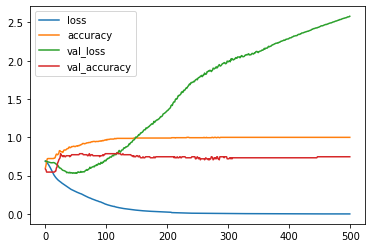

In [ ]:
model_loss.plot()

In [ ]:
predictions = model.predict_classes(X_test)
print(confusion_matrix(y_test,predictions))

[[46  7]
 [10 12]]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
# generating classification report
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84        53
           1       0.63      0.55      0.59        22

    accuracy                           0.77        75
   macro avg       0.73      0.71      0.71        75
weighted avg       0.77      0.77      0.77        75



## Model 2 (Early Stopping)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model = Sequential()

# Take input of 12 units
model.add(Dense(units = 12, activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(6,activation='relu'))

# Final output node for prediction
model.add(Dense(1,activation='sigmoid'))

# For a binary classification problem
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

In [ ]:
%%time
model.fit(x=X_train, y=y_train, epochs=500, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stop])

Epoch 1/500
7/7 [==============================] - 1s 50ms/step - loss: 0.9065 - accuracy: 0.3274 - val_loss: 0.8516 - val_accuracy: 0.3600
Epoch 2/500
7/7 [==============================] - 0s 14ms/step - loss: 0.8766 - accuracy: 0.3281 - val_loss: 0.8060 - val_accuracy: 0.3733
Epoch 3/500
7/7 [==============================] - 0s 14ms/step - loss: 0.8573 - accuracy: 0.3047 - val_loss: 0.7673 - val_accuracy: 0.3867
Epoch 4/500
7/7 [==============================] - 0s 14ms/step - loss: 0.7729 - accuracy: 0.3516 - val_loss: 0.7380 - val_accuracy: 0.4267
Epoch 5/500
7/7 [==============================] - 0s 13ms/step - loss: 0.7507 - accuracy: 0.3752 - val_loss: 0.7135 - val_accuracy: 0.5333
Epoch 6/500
7/7 [==============================] - 0s 13ms/step - loss: 0.7132 - accuracy: 0.5045 - val_loss: 0.6937 - val_accuracy: 0.5867
Epoch 7/500
7/7 [==============================] - 0s 18ms/step - loss: 0.7077 - accuracy: 0.5049 - val_loss: 0.6773 - val_accuracy: 0.5867
Epoch 8/500
7/7 [===

In [ ]:
model.save('my_model002.h5')  # creates a HDF5 (Hierarchical Data Format 5) file 'my_model.h5'
model2 = load_model('my_model002.h5')

In [ ]:
# model.history.history
model_loss = pd.DataFrame(model.history.history)
model_loss

,loss,accuracy,val_loss,val_accuracy
0,0.933704,0.316964,0.851594,0.360000
1,0.872245,0.316964,0.806008,0.373333
2,0.822218,0.334821,0.767333,0.386667
3,0.775037,0.352679,0.737955,0.426667
4,0.742205,0.397321,0.713491,0.533333
...,...,...,...,...
61,0.290404,0.888393,0.458949,0.786667
62,0.287197,0.888393,0.461896,0.786667
63,0.284434,0.892857,0.464154,0.800000
64,0.281581,0.892857,0.467697,0.786667


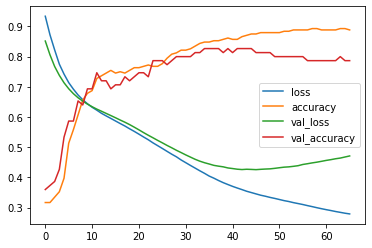

In [ ]:
model_loss.plot()

In [ ]:
predictions = model.predict_classes(X_test)
print(confusion_matrix(y_test,predictions))

[[45  6]
 [10 14]]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        51
           1       0.70      0.58      0.64        24

    accuracy                           0.79        75
   macro avg       0.76      0.73      0.74        75
weighted avg       0.78      0.79      0.78        75



### Model 3 (Dropout)

In [ ]:
# import the required library
from tensorflow.keras.layers import Dropout

In [ ]:
model = Sequential()

# Take input of 10 units
model.add(Dense(units = 12, input_shape=(12,), activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(8,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(6, activation='relu'))
model.add(Dropout(0.2))

# Final output node for prediction
model.add(Dense(1, activation='sigmoid'))

# For a binary classification problem
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
%%time
model.fit(x=X_train, y=y_train, epochs=500, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stop])

Epoch 1/500
7/7 [==============================] - 1s 54ms/step - loss: 1.0306 - accuracy: 0.4330 - val_loss: 0.8490 - val_accuracy: 0.4267
Epoch 2/500
7/7 [==============================] - 0s 15ms/step - loss: 0.8735 - accuracy: 0.5623 - val_loss: 0.8197 - val_accuracy: 0.4267
Epoch 3/500
7/7 [==============================] - 0s 17ms/step - loss: 0.8075 - accuracy: 0.5445 - val_loss: 0.7955 - val_accuracy: 0.4533
Epoch 4/500
7/7 [==============================] - 0s 12ms/step - loss: 0.8344 - accuracy: 0.5586 - val_loss: 0.7755 - val_accuracy: 0.4667
Epoch 5/500
7/7 [==============================] - 0s 14ms/step - loss: 0.8014 - accuracy: 0.5243 - val_loss: 0.7585 - val_accuracy: 0.4267
Epoch 6/500
7/7 [==============================] - 0s 16ms/step - loss: 0.8776 - accuracy: 0.4899 - val_loss: 0.7435 - val_accuracy: 0.4533
Epoch 7/500
7/7 [==============================] - 0s 17ms/step - loss: 0.8266 - accuracy: 0.5509 - val_loss: 0.7300 - val_accuracy: 0.4533
Epoch 8/500
7/7 [===

In [ ]:
model.save('my_model003.h5')  # creates a HDF5 (Hierarchical Data Format 5) file 'my_model.h5'
model3 = load_model('my_model003.h5')

In [ ]:
# model.history.history
model_loss = pd.DataFrame(model.history.history)
model_loss

,loss,accuracy,val_loss,val_accuracy
0,0.980521,0.446429,0.848970,0.426667
1,0.856107,0.575893,0.819676,0.426667
2,0.836029,0.540179,0.795496,0.453333
3,0.835910,0.558036,0.775492,0.466667
4,0.809298,0.544643,0.758517,0.426667
...,...,...,...,...
154,0.428968,0.803571,0.487328,0.813333
155,0.476024,0.745536,0.487504,0.813333
156,0.427643,0.794643,0.487142,0.813333
157,0.443804,0.790179,0.487776,0.813333


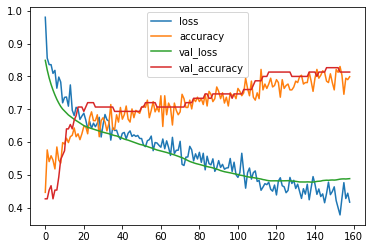

In [ ]:
model_loss.plot()

In [ ]:
predictions = model.predict_classes(X_test)
print(confusion_matrix(y_test,predictions))

[[45  6]
 [ 8 16]]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
# generating classification report
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87        51
           1       0.73      0.67      0.70        24

    accuracy                           0.81        75
   macro avg       0.79      0.77      0.78        75
weighted avg       0.81      0.81      0.81        75



The accuracy of models is as follows:
* model1 = 75%
* model2 = 79%
* model3 = 81%

Since model3 has the highest accuracy, we will use it to make predictions on the new data


In [ ]:
from sklearn.model_selection import train_test_split
Input_train, Input_test, Target_train, Target_test = train_test_split(X, y, test_size = 0.30, random_state = 5)
print(Input_train.shape)
print(Input_test.shape)
print(Target_train.shape)
print(Target_test.shape)

(209, 12)
(90, 12)
(209,)
(90,)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(30, input_dim=12, activation='tanh'))
model.add(Dense(20, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6916 - accuracy: 0.5176
Epoch 2/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6342 - accuracy: 0.6523
Epoch 3/100
7/7 [==============================] - 0s 3ms/step - loss: 0.5829 - accuracy: 0.7479
Epoch 4/100
7/7 [==============================] - 0s 3ms/step - loss: 0.5596 - accuracy: 0.7604
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 0.5579 - accuracy: 0.7345
Epoch 6/100
7/7 [==============================] - 0s 3ms/step - loss: 0.5045 - accuracy: 0.7781
Epoch 7/100
7/7 [==============================] - 0s 3ms/step - loss: 0.4978 - accuracy: 0.7469
Epoch 8/100
7/7 [==============================] - 0s 3ms/step - loss: 0.4890 - accuracy: 0.7653
Epoch 9/100
7/7 [==============================] - 0s 3ms/step - loss: 0.4554 - accuracy: 0.8230
Epoch 10/100
7/7 [==============================] - 0s 3ms/step - loss: 0.4320 - accuracy: 0.8203
Epoch 11/100
7/7 [===========

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 30)                390       
_________________________________________________________________
dense_21 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 21        
Total params: 1,031
Trainable params: 1,031
Non-trainable params: 0
_________________________________________________________________


In [ ]:
predictions = model.predict_classes(X_test)
print(confusion_matrix(y_test,predictions))

[[37  4]
 [11 23]]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
# generating classification report
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83        41
           1       0.85      0.68      0.75        34

    accuracy                           0.80        75
   macro avg       0.81      0.79      0.79        75
weighted avg       0.81      0.80      0.80        75



# Experimental Analysis

In [ ]:
# initialize list of lists
data = [['K Nearest Neighbours', 77.419], ['Decision Tree', 83.871], ['Random Forest', 87.096], ['Naïve Bayes', 90.322], ['Multilayer Perceptron', 96.774]]

# Create the pandas DataFrame
df = pd.DataFrame(data, columns = ['Classifier', 'Accuracy'])

# print dataframe
df

,Classifier,Accuracy
0,K Nearest Neighbours,77.419
1,Decision Tree,83.871
2,Random Forest,87.096
3,Naïve Bayes,90.322
4,Multilayer Perceptron,96.774


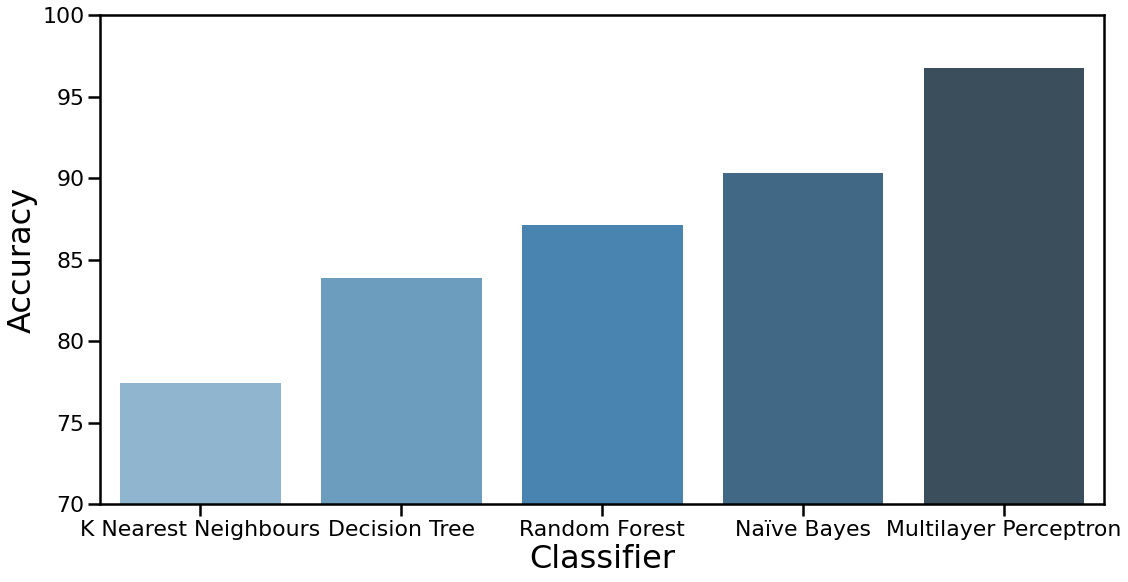

In [ ]:
plt.figure(figsize=(18,9))
ax = sns.barplot(x='Classifier', y='Accuracy', data = df, palette=("Blues_d"))
ax.set(ylim=(70, 100))
ax.set_ylabel('Accuracy', size=32)
ax.set_xlabel('Classifier', size=32)
plt.show()